https://github.com/JeffreyPrasetio/DSI-23-Group-Project/blob/main/codes/01%20Introduction.ipynb

In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from geopy.distance import geodesic

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

## 1. Data Cleaning and Processing

### Import data

In [3]:
# Setting the dataset paths

PATH = '..'
# train_path = "../data/train.csv"
# test_path = "../data/test.csv"
# weather_path = "./data/weather.csv"
# spray_path = "./data/spray.csv"

### Weather Data

In [4]:
weather_df = pd.read_csv(f'{PATH}/data/weather.csv')

In [5]:
weather_df.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

   ... CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0  ...             0      M      0.0        0.00       29.10    29.82   
1  ...             M      M        M        0.00       29.18    29.82   
2  ...      BR     0      M      0.0        0.00       29.38    30.09   
3  ...   BR HZ     M      M        M        0.00       29.44    30.08   
4  ...             0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [6]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [7]:
weather_df['CodeSum'].value_counts().head()

              1609
RA             296
RA BR          238
BR             110
TSRA RA BR      92
Name: CodeSum, dtype: int64

In [8]:
codesum = weather_df['CodeSum']
print(codesum[:5])
codesum = " ".join(codesum)
print(codesum)
codesum = codesum.split()
print(codesum[:5])
codesum_n = set(codesum)
print(codesum_n)
codesum_n = list(codesum_n)

0         
1         
2       BR
3    BR HZ
4         
Name: CodeSum, dtype: object
    BR BR HZ   HZ RA           RA   BR HZ BR HZ BR HZ BR BR HZ                 RA BR TSRA RA BR RA BR RA BR             RA VCTS TSRA RA             RA HZ RA HZ   RA BR TSRA RA BR HZ TSRA RA BR RA BR RA BR RA   BR HZ BR HZ HZ HZ RA HZ RA BR TSRA BR HZ TSRA BR HZ RA BR RA BR TSRA RA BR HZ RA BR HZ VCTS TSRA RA BR RA BR RA BR RA BR RA RA                                     RA HZ HZ HZ HZ TSRA RA HZ TSRA RA HZ RA RA BR     RA RA RA RA RA BR RA BR BR HZ BR HZ BR HZ BR HZ TSRA BR HZ VCTS BR HZ TSRA TSRA RA BR                     TSRA RA BR TSRA RA TSRA BR HZ FU TSRA RA HZ FU BR HZ FU BR             TSRA RA VCTS RA HZ VCTS TSRA HZ       VCTS             RA BR TSRA RA RA BR VCTS RA BR TSRA RA BR VCTS TS TSRA RA BR HZ VCTS DZ BR BR HZ                         TS TSRA RA BR HZ TS TSRA BR HZ RA BR HZ RA BR HZ BR HZ BR HZ             HZ   HZ       RA RA TSRA RA BR HZ TSRA RA BR VCTS TSRA RA BR HZ TS TSRA BR HZ RA BR

In [9]:
# Create new columns for unique CodeSum codes.
# Something like OHE
for cs in codesum_n:
    weather_df[cs] = weather_df['CodeSum'].map(lambda x: 1 if cs in x.split() else 0)
    

In [10]:
weather_df[codesum_n].sum().sort_values(ascending=False)

RA      935
BR      813
TSRA    305
HZ      263
DZ      133
TS      102
FG+      27
VCTS     19
FG       16
FU        9
SN        6
BCFG      5
VCFG      4
SQ        3
MIFG      3
GR        1
dtype: int64

In [11]:
# Create 'rain' column to indicate if there is rain. 
weather_df['rain'] = weather_df["CodeSum"].str.contains("TS|RA|DZ")
weather_df['rain'] = weather_df['rain'].map(lambda x: 1 if x else 0)

In [12]:
weather_df['rain']

0       0
1       0
2       0
3       0
4       0
       ..
2939    0
2940    0
2941    1
2942    1
2943    1
Name: rain, Length: 2944, dtype: int64

In [13]:
weather_df["Tavg"] = round((weather_df["Tmax"] + weather_df["Tmin"]) / 2)

In [14]:
M_col_list = [col for col in weather_df.columns 
              if len(weather_df[weather_df["Heat"] == 'M']) >= 0 
              and col not in ("Depart", "Depth", "Water1", "SnowFall")]

M_col_list

['Station',
 'Date',
 'Tmax',
 'Tmin',
 'Tavg',
 'DewPoint',
 'WetBulb',
 'Heat',
 'Cool',
 'Sunrise',
 'Sunset',
 'CodeSum',
 'PrecipTotal',
 'StnPressure',
 'SeaLevel',
 'ResultSpeed',
 'ResultDir',
 'AvgSpeed',
 'VCTS',
 'HZ',
 'SQ',
 'RA',
 'VCFG',
 'TSRA',
 'BR',
 'FG',
 'FU',
 'DZ',
 'SN',
 'GR',
 'FG+',
 'TS',
 'BCFG',
 'MIFG',
 'rain']

In [15]:
def replace_M(df, col_list):
    for col in col_list:
        mode = df[col].mode()
        df[col].replace('M', mode[0], inplace=True)

In [16]:
replace_M(weather_df, M_col_list)

In [17]:
# Convert date column to datetime
weather_df["Date"] = pd.to_datetime(weather_df["Date"])

In [18]:
# # Create columns for Year, Month, Week
# weather_df['Year'] = weather_df['Date'].dt.year
# weather_df['Month'] = weather_df['Date'].dt.month
# weather_df['Week'] = weather_df['Date'].dt.isocalendar().week

In [19]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   float64       
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

In [20]:
for i in range(len(weather_df)):
    if i %2 != 0:
        weather_df.loc[i, "Sunrise"] = weather_df.loc[i-1, "Sunrise"]
        weather_df.loc[i, "Sunset"] = weather_df.loc[i-1, "Sunset"]

In [21]:
sunset_time=[]

for i, time in enumerate(weather_df["Sunset"]):
    if int(time[2:4]) > 59:
        sunset_time.append(time)

        

In [22]:
set(sunset_time)

{'1660', '1760', '1860'}

In [23]:
for i, t in enumerate(weather_df["Sunset"]):
    if t=='1660':
        weather_df.loc[i, "Sunset"] = '1700'
    elif t=='1760':
        weather_df.loc[i, "Sunset"] = '1800'
    elif t=='1860':
        weather_df.loc[i, "Sunset"] = '1800'
    

In [24]:
weather_df[['Sunrise', 'Sunset']]

Sunrise Sunset
0       0448   1849
1       0448   1849
2       0447   1850
3       0447   1850
4       0446   1851
...      ...    ...
2939    0620   1650
2940    0622   1649
2941    0622   1649
2942    0623   1647
2943    0623   1647

[2944 rows x 2 columns]

In [25]:
weather_df['Sunrise'] = weather_df['Sunrise'].map(lambda t: dt.datetime.strptime(t,'%H%M').strftime('%H:%M'))

In [26]:
weather_df['Sunset'] = weather_df['Sunset'].map(lambda t: dt.datetime.strptime(t,'%H%M').strftime('%H:%M'))

In [27]:
pd.Timestamp('17:10') - pd.Timestamp('9:45')


Timedelta('0 days 07:25:00')

In [28]:
weather_df['DayDuration']= pd.to_datetime(weather_df['Sunset'])-pd.to_datetime(weather_df['Sunrise'])

In [29]:
weather_df['DayDuration']

0      0 days 14:01:00
1      0 days 14:01:00
2      0 days 14:03:00
3      0 days 14:03:00
4      0 days 14:05:00
             ...      
2939   0 days 10:30:00
2940   0 days 10:27:00
2941   0 days 10:27:00
2942   0 days 10:24:00
2943   0 days 10:24:00
Name: DayDuration, Length: 2944, dtype: timedelta64[ns]

### Spray Data

In [30]:
# Reading the datasets into dataframes

spray_df = pd.read_csv(f'{PATH}/data/spray.csv')

In [31]:
spray_df.head()

Date        Time   Latitude  Longitude
0  2011-08-29  6:56:58 PM  42.391623 -88.089163
1  2011-08-29  6:57:08 PM  42.391348 -88.089163
2  2011-08-29  6:57:18 PM  42.391022 -88.089157
3  2011-08-29  6:57:28 PM  42.390637 -88.089158
4  2011-08-29  6:57:38 PM  42.390410 -88.088858

In [32]:
spray_df.drop(spray_df[(spray_df['Latitude'] > 42.1) & (spray_df['Longitude'] < -88)].index, inplace=True)

### Train and Test Data

In [33]:
# Reading the datasets into dataframes

train = pd.read_csv(f'{PATH}/data/train.csv')
test = pd.read_csv(f'{PATH}/data/test.csv')

In [34]:
# Display first 5 rows for train data
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [35]:
# Display first 5 rows for test data
test.head()

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2   3  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
3   4  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
4   5  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2           CULEX PIPIENS     41   N OAK PARK AVE  T002   
3        CULEX SALINARIUS     41   N OAK PARK AVE  T002   
4         CULEX TERRITANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
2  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
3  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
4  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

In [36]:
# Display summary info and data types. 
# no null values
# only date column need to be converted.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [37]:
# Display summary info and datatypes
# no null values
# only date column need to be converted.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [38]:
# Convert date column to datetime
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [39]:
# Create columns for Year, Month, Week
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.isocalendar().week

**Observations**:

1. For the train data, there are a total of 12 features and about 10,000 entries
2. For the test data, there are a total of 11 columns and about 115k entries.
3. In test data, id is required as part of the csv file for submission. 
2. The test data does not include 'NumMosquitos', 'WnvPresent' columns, compared to the train data. 

#### Checking for null values and duplicates

**Null values**
- There are no null values in both train and test data.

**Duplicated entries**
- Out of 10,506 entries, 813 entries are duplicated. 

In [40]:
# No null values in train data
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Year                      0
Month                     0
Week                      0
dtype: int64

In [41]:
# No null values in test data
test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
Year                      0
Month                     0
Week                      0
dtype: int64

In [42]:
# Check for duplicates 
train.duplicated().value_counts()

False    9693
True      813
dtype: int64

In [43]:
# No duplicates value for test data
test.duplicated().value_counts()

False    116293
dtype: int64

In [44]:
# Display Unique values of 'NumMosquitos' for duplicated rows
train[train.duplicated()][['NumMosquitos']].value_counts()

NumMosquitos
50              707
1                46
2                16
3                14
5                 4
9                 3
4                 3
8                 2
43                2
28                1
48                1
46                1
45                1
40                1
39                1
37                1
21                1
26                1
23                1
16                1
15                1
13                1
12                1
10                1
18                1
dtype: int64

#### Checking Trap Data
1. Trap locations (latitude and longitude) for T009 and T035 are not consistent. Traps may be shifted when collecting data.  

**Trap Info**

In [109]:
train['Trap'].nunique()

135

**Trap Locations**

In [45]:
# Create Dataframe to check if location of trap is consistent throughout mosquito collection.  
trap_add = train.groupby(by=['Trap','Latitude','Longitude']).sum()[['NumMosquitos', 'WnvPresent']].reset_index()

In [46]:
# Extract trap that do not have consistent locations. 
trap_add[trap_add[['Trap']].duplicated()]

Trap   Latitude  Longitude  NumMosquitos  WnvPresent
9   T009  41.992478 -87.862995          1477           6
27  T035  41.836644 -87.677737            94           1

In [47]:
# Display trap data for T009 and T035
trap_add[(trap_add['Trap']=='T009') | (trap_add['Trap']=='T035')]

Trap   Latitude  Longitude  NumMosquitos  WnvPresent
8   T009  41.981964 -87.812827           463           3
9   T009  41.992478 -87.862995          1477           6
26  T035  41.763733 -87.742302           215           2
27  T035  41.836644 -87.677737            94           1

**Address Accuracy**

In [48]:
# Get unique values for "AddressAccuracy"
train["AddressAccuracy"].unique()

array([9, 8, 5, 3], dtype=int64)

In [92]:
# Display Data for low address accuracy
# These address are very generic and may not be useful in determining the locations. 
col = ['Trap', 'Date', 'Address', 'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent']
train[train["AddressAccuracy"]<5][col]

Trap       Date           Address   Latitude  Longitude  \
69     T145 2007-06-05  Chicago, IL, USA  41.878114 -87.629798   
127    T145 2007-06-26  Chicago, IL, USA  41.878114 -87.629798   
179    T145 2007-06-29  Chicago, IL, USA  41.878114 -87.629798   
237    T145 2007-07-02  Chicago, IL, USA  41.878114 -87.629798   
342    T145 2007-07-11  Chicago, IL, USA  41.878114 -87.629798   
...     ...        ...               ...        ...        ...   
10049  T145 2013-09-06  Chicago, IL, USA  41.878114 -87.629798   
10050  T145 2013-09-06  Chicago, IL, USA  41.878114 -87.629798   
10191  T145 2013-09-12  Chicago, IL, USA  41.878114 -87.629798   
10326  T145 2013-09-19  Chicago, IL, USA  41.878114 -87.629798   
10433  T145 2013-09-26  Chicago, IL, USA  41.878114 -87.629798   

       AddressAccuracy  NumMosquitos  WnvPresent  
69                   3             3           0  
127                  3             1           0  
179                  3             1           0  
237                  3             1           0  
342                  3             3           0  
...                ...           ...         ...  
10049                3            10           0  
10050                3            27           0  
10191                3             1           0  
10326                3             9           0  
10433                3             2           0  

[91 rows x 8 columns]

In [97]:
# T145 trap has low address accuracy. 
train[train["AddressAccuracy"]<5][col]['Trap'].unique()

array(['T145'], dtype=object)

In [102]:
# The NumMosquitos caught and the Wnv Present over the years are insignificant
# Hence, these rows will be dropped
train[train["AddressAccuracy"]<5][col].sum()[['NumMosquitos', 'WnvPresent']]

NumMosquitos    402
WnvPresent        1
dtype: object

In [105]:
train[train["AddressAccuracy"]<5].index

Int64Index([   69,   127,   179,   237,   342,   343,   557,   728,   729,
              929,   930,   931,   932,   933,   934,   935,   936,   937,
              938,  1542,  1543,  1544,  1545,  1868,  1869,  2246,  2247,
             2248,  2249,  2582,  2583,  2584,  2585,  3231,  3232,  3304,
             3460,  3461,  3659,  4215,  4362,  4363,  4483,  4772,  4923,
             5590,  5591,  5772,  6140,  6246,  6247,  6348,  6471,  6472,
             6616,  6791,  6792,  6971,  7107,  7108,  7244,  7366,  7492,
             7493,  7584,  7585,  7712,  7713,  7844,  7965,  8061,  8126,
             8217,  8218,  8334,  8572,  8880,  8881,  9063,  9217,  9218,
             9407,  9587,  9588,  9746,  9907, 10049, 10050, 10191, 10326,
            10433],
           dtype='int64')

In [107]:
# Drop rows with low address accuracy. 
train.drop(index=train[train["AddressAccuracy"]<5].index, 
           inplace=True)

In [49]:
# As location could be represented by Latitude and Longitude,
# redundant address related columns will not be included in data.

# train.drop(columns=["Address", "Block", "Street", "AddressAccuracy"], 
#            inplace=True)
# test.drop(columns=["Address", "Block", "Street", "AddressAccuracy"], 
#            inplace=True)

In [50]:
# Display differences in the columns of train and test data
set(train.columns)-set(test.columns)

{'NumMosquitos', 'WnvPresent'}

In [51]:
# 
train[train.duplicated()].groupby(['Year','Trap']).sum()[['NumMosquitos']]

NumMosquitos
Year Trap              
2007 T002            16
     T003             1
     T016            50
     T017             1
     T025             1
...                 ...
2013 T212            87
     T221           200
     T227            98
     T233            50
     T900          1279

[78 rows x 1 columns]

In [52]:
# Define function to map Station 1 or 2
def input_station(lat:int, lng:int):
    stn1 = (41.995, -87.933)
    stn2 = (41.786, -87.752)
    coord = (lat, lng)
    
    if (geodesic(coord, stn1) 
        < geodesic(coord, stn2)):
        return 1
    
    else:
        return 2

In [53]:
# Create Station Column and map station
train_merged = train.copy()
train_merged['Station'] = train_merged.apply(
    lambda x: input_station(x['Latitude'], x['Longitude']), 
    axis=1
)

test_merged = train.copy()
test_merged['Station'] = test_merged.apply(
    lambda x: input_station(x['Latitude'], x['Longitude']), 
    axis=1
)


In [54]:
# Merge the Train/Test and Weather data
train_merged = train_merged.merge(weather_df, how="left", on=["Station", "Date"])

test_merged = test_merged.merge(weather_df, how="left", on=["Station", "Date"])

## 2. EDA

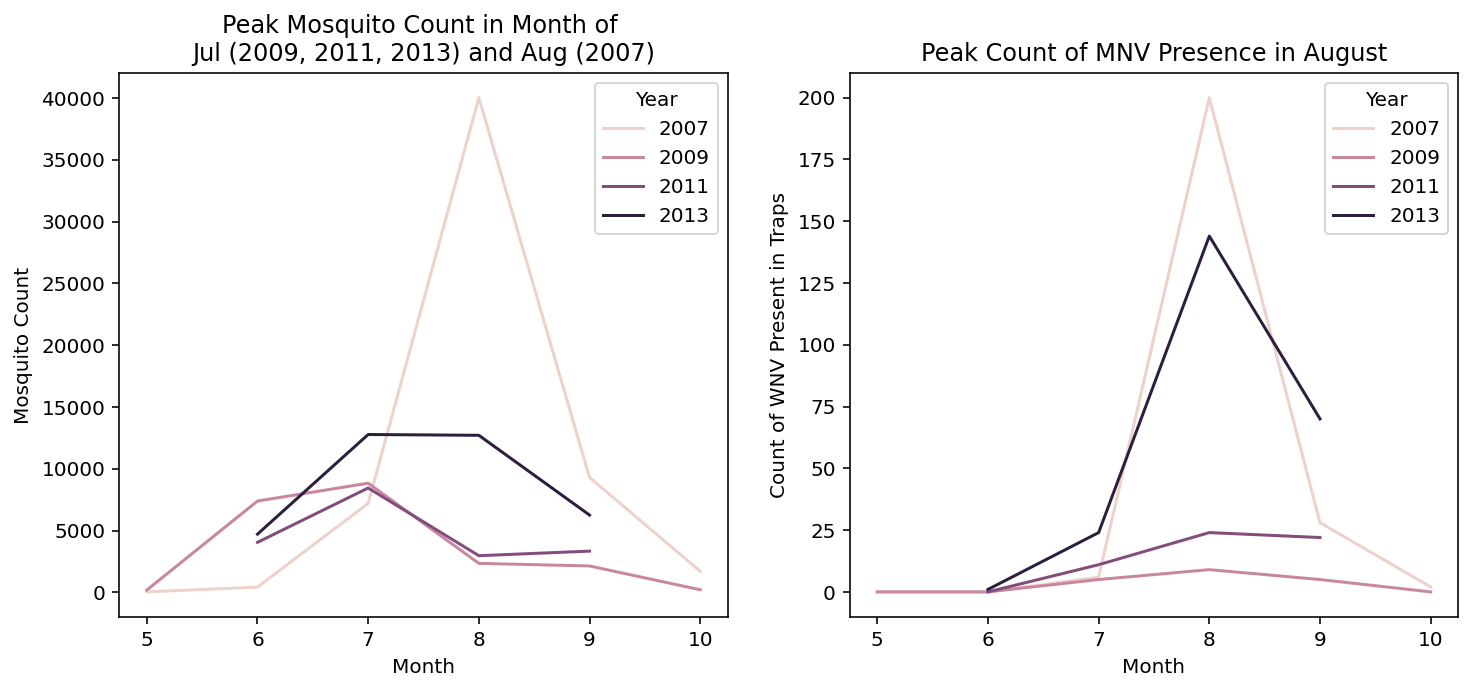

In [55]:
# plot mosquitos/ WnvPresent count by month and year
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False, figsize=(12,5))
axes=axes.ravel()

# plot WNV occurrences by month and year
sns.lineplot(x='Month', 
             y='NumMosquitos',
             hue='Year', 
             data=train_merged.groupby(by=['Year','Month']).sum()[['NumMosquitos']],
             ax=axes[0],
             ci = None)
axes[0].set_ylabel("Mosquito Count")
axes[0].set_title('Peak Mosquito Count in Month of \nJul (2009, 2011, 2013) and Aug (2007)')

# plot WNV occurrences by month and year
sns.lineplot(x='Month', 
             y='WnvPresent',
             hue='Year', 
             data=train_merged.groupby(by=['Year','Month']).sum()[['WnvPresent']],
             ax=axes[1],
             ci = None)
axes[1].set_ylabel("Count of WNV Present in Traps")
axes[1].set_title('Peak Count of MNV Presence in August')

plt.show()

In [56]:
weather_df.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'VCTS', 'HZ', 'SQ', 'RA',
       'VCFG', 'TSRA', 'BR', 'FG', 'FU', 'DZ', 'SN', 'GR', 'FG+', 'TS', 'BCFG',
       'MIFG', 'rain', 'DayDuration'],
      dtype='object')

In [57]:
# plot locations of traps and instances of WNV cases
# Instantiating map variables. 
mapdata = np.loadtxt(f'{PATH}/data/mapdata_copyright_openstreetmap_contributors.txt')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_boundary = (-88, -87.5, 41.6, 42.1)

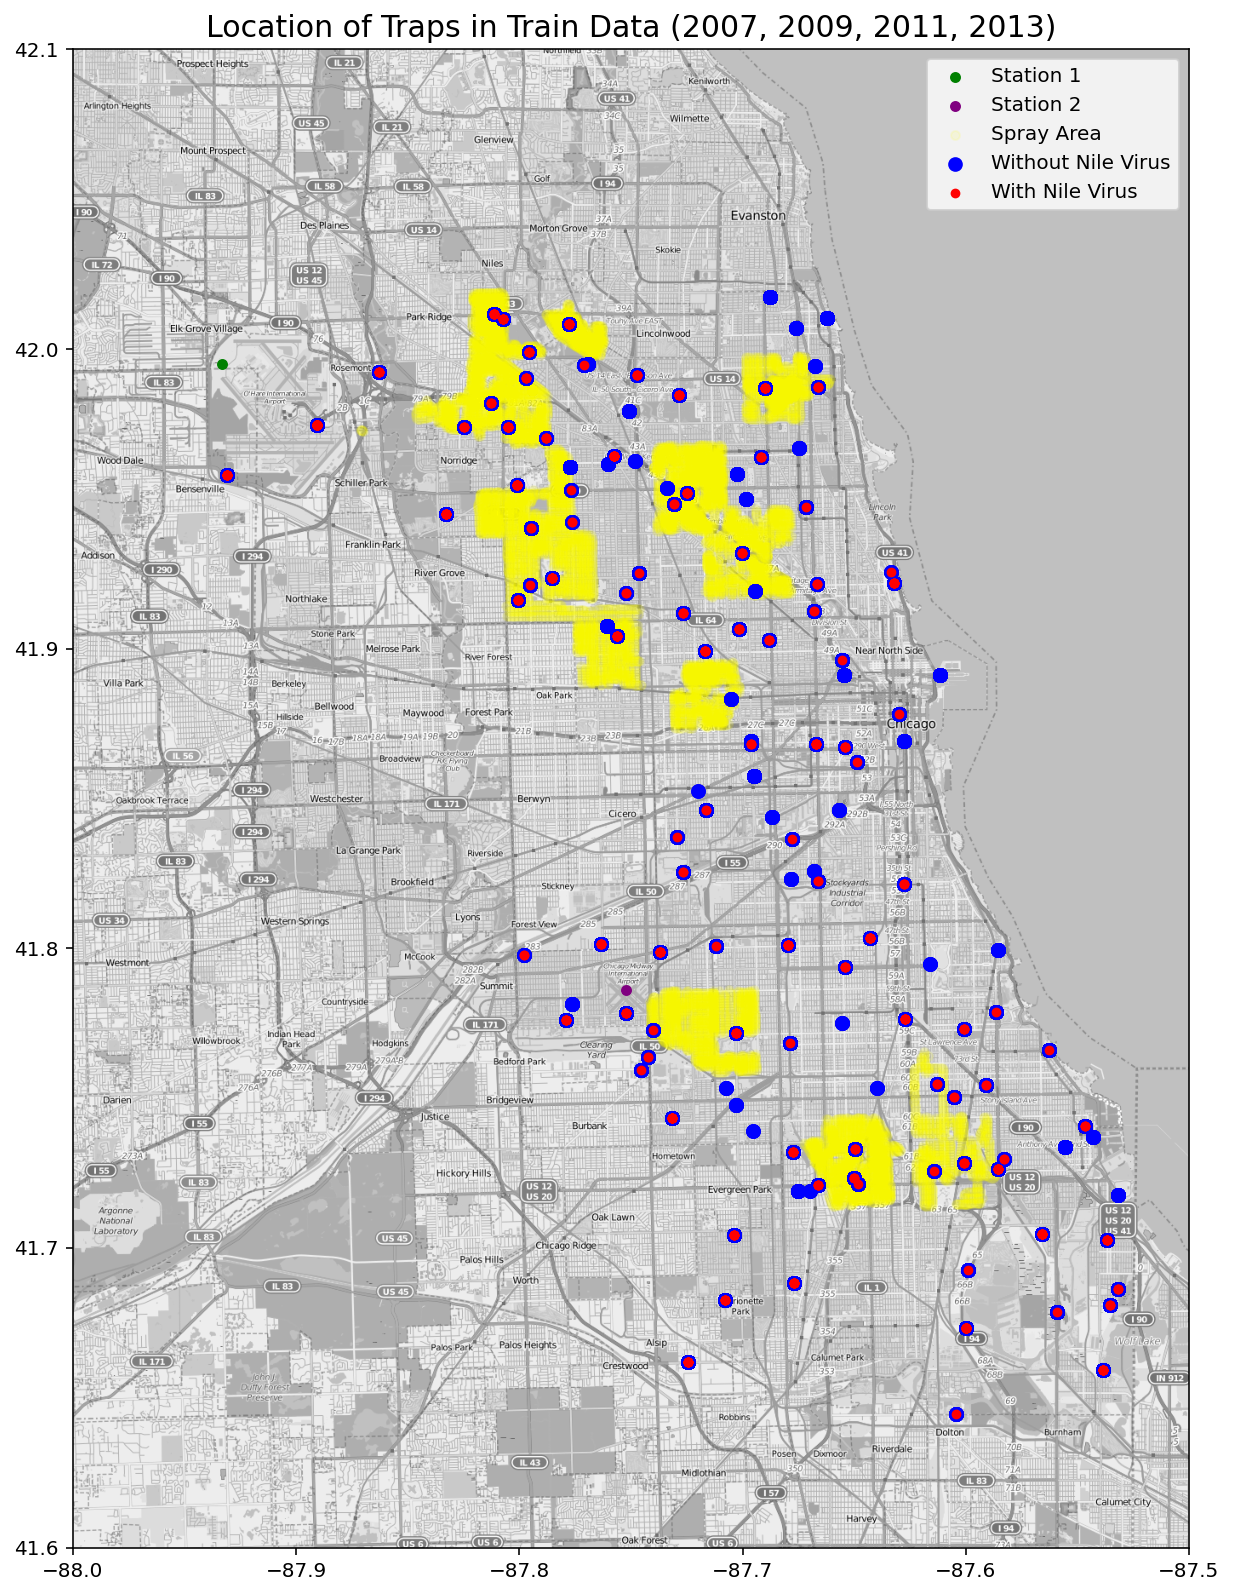

In [58]:
# plot locations of traps and instances of WNV cases
wnv = train_merged.loc[train_merged["WnvPresent"]==1]
no_wnv = train_merged.loc[train_merged["WnvPresent"]==0]

plt.figure(figsize=(10,14))

plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_boundary, 
           aspect=aspect)

# plot station 1
plt.scatter(-87.933, 
            41.995, 
            c="green", 
            # marker='x', 
            s=20, 
            alpha=1, 
            label='Station 1')

# plot station 2
plt.scatter(-87.752, 
            41.786, 
            c="purple", 
            # marker='x', 
            s=20, 
            alpha=1, 
            label='Station 2')

# plot spray area
plt.scatter(spray_df['Longitude'], 
            spray_df['Latitude'], 
            c="yellow", 
            # marker='x', 
            s=20, 
            alpha=0.1, 
            label='Spray Area')

# plot no wnv traps
plt.scatter(no_wnv['Longitude'], 
            no_wnv['Latitude'], 
            c="blue", 
            # marker='x', 
            s=40, 
            alpha=1, 
            label='Without Nile Virus')

# plot traps with wnv
plt.scatter(wnv['Longitude'], 
            wnv['Latitude'], 
            c="red", 
            # marker='x', 
            s=15, 
            alpha=1, 
            label='With Nile Virus')

plt.title("Location of Traps in Train Data (2007, 2009, 2011, 2013)", 
          fontsize=15)
plt.legend();

In [59]:
# Dataframe for top locations with highest number of mosquitos
top_mos_count_df = train_merged.groupby(
    by=['Longitude','Latitude']
).sum()[['NumMosquitos', 'WnvPresent']].sort_values(by='NumMosquitos', 
                                                    ascending=False).head(20)

top_mos_count_df.head()

NumMosquitos  WnvPresent
Longitude  Latitude                           
-87.599862 41.673408         21668          41
-87.890615 41.974689         15386          66
-87.585413 41.726465          9936          16
-87.800991 41.954690          3710          18
-87.565666 41.704572          3315          11

In [60]:
# Dataframe for top locations with highest number of WnvPresent
top_wnv_count_df = train_merged.groupby(
    by=['Longitude','Latitude']
).sum()[['NumMosquitos', 'WnvPresent']].sort_values(by='WnvPresent', 
                                                    ascending=False).head(20)

top_wnv_count_df.head()

NumMosquitos  WnvPresent
Longitude  Latitude                           
-87.890615 41.974689         15386          66
-87.599862 41.673408         21668          41
-87.800991 41.954690          3710          18
-87.585413 41.726465          9936          16
-87.757639 41.964242          1346          14

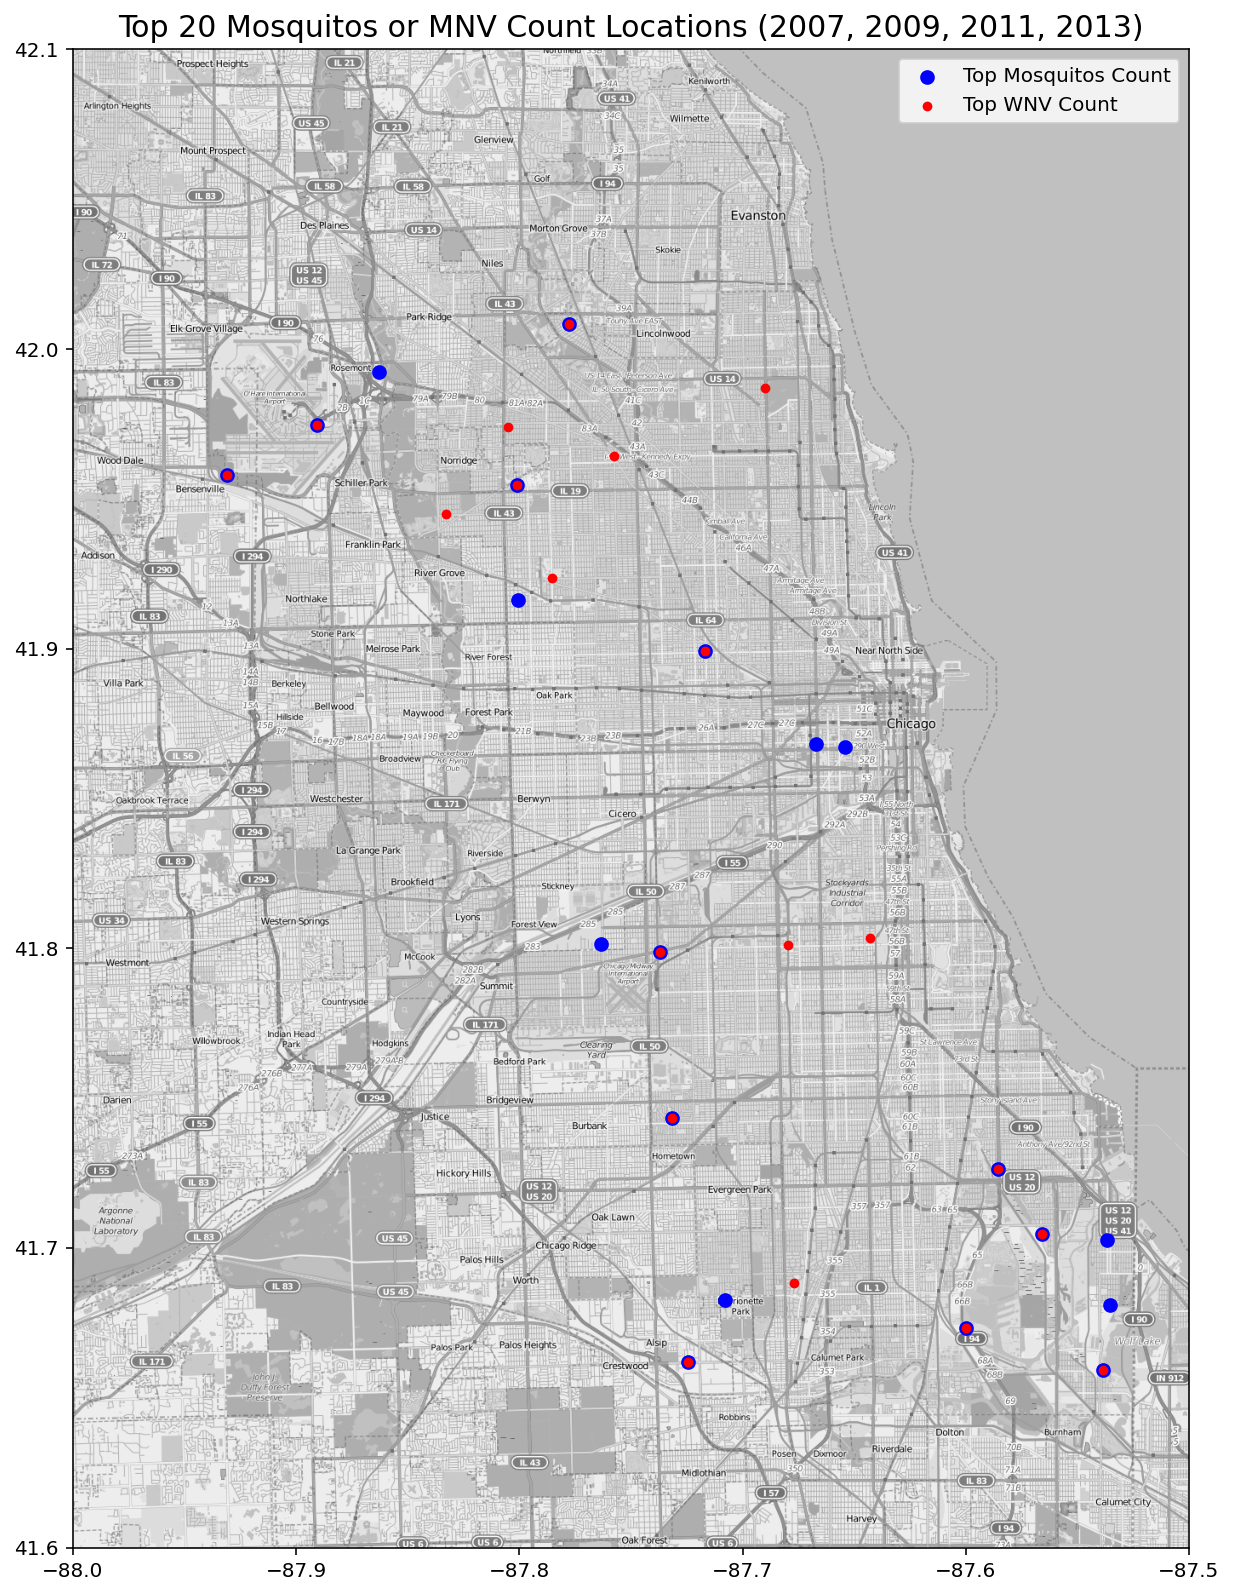

In [61]:
# plot locations of traps and instances of WNV cases

plt.figure(figsize=(10,14))

plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_boundary, 
           aspect=aspect)

plt.scatter(top_mos_count_df.index.get_level_values(0), 
            top_mos_count_df.index.get_level_values(1), 
            c="blue", 
            # marker='x', 
            s=40, 
            alpha=1, 
            label='Top Mosquitos Count')

plt.scatter(top_wnv_count_df.index.get_level_values(0), 
            top_wnv_count_df.index.get_level_values(1), 
            c="red", 
            # marker='x', 
            s=15, 
            alpha=1, 
            label='Top WNV Count')

plt.title("Top 20 Mosquitos or MNV Count Locations (2007, 2009, 2011, 2013)", 
          fontsize=15)
plt.legend();

In [62]:
# Display locations that are top mosquitos and WNV count
# These locations may be of interest to implement mitigations.
top_mos_count_df.index.intersection(top_wnv_count_df.index)


MultiIndex([(-87.599862, 41.673408),
            (-87.890615, 41.974689),
            (-87.585413, 41.726465),
            (-87.800991,  41.95469),
            (-87.565666, 41.704572),
            (-87.724608, 41.662014),
            (-87.777921, 42.008314),
            (-87.930995, 41.957799),
            (-87.736812, 41.798697),
            (-87.731435, 41.743402),
            (-87.716788,  41.89923),
            (-87.538693, 41.659112)],
           names=['Longitude', 'Latitude'])

In [63]:
spray_df.head()

Date        Time   Latitude  Longitude
95  2011-09-07  7:52:52 PM  41.981433 -87.787777
96  2011-09-07  7:53:02 PM  41.980998 -87.787778
97  2011-09-07  7:53:12 PM  41.980560 -87.787762
98  2011-09-07  7:53:22 PM  41.980198 -87.787758
99  2011-09-07  7:53:32 PM  41.979752 -87.787765

In [64]:
# Create Dataaframe of species for analysis
species_df=train_merged.groupby(by=['Species']).sum()[['NumMosquitos', 'WnvPresent']].reset_index()
species_df

Species  NumMosquitos  WnvPresent
0         CULEX ERRATICUS             7           0
1           CULEX PIPIENS         44671         240
2  CULEX PIPIENS/RESTUANS         66268         262
3          CULEX RESTUANS         23431          49
4        CULEX SALINARIUS           145           0
5          CULEX TARSALIS             7           0
6         CULEX TERRITANS           510           0

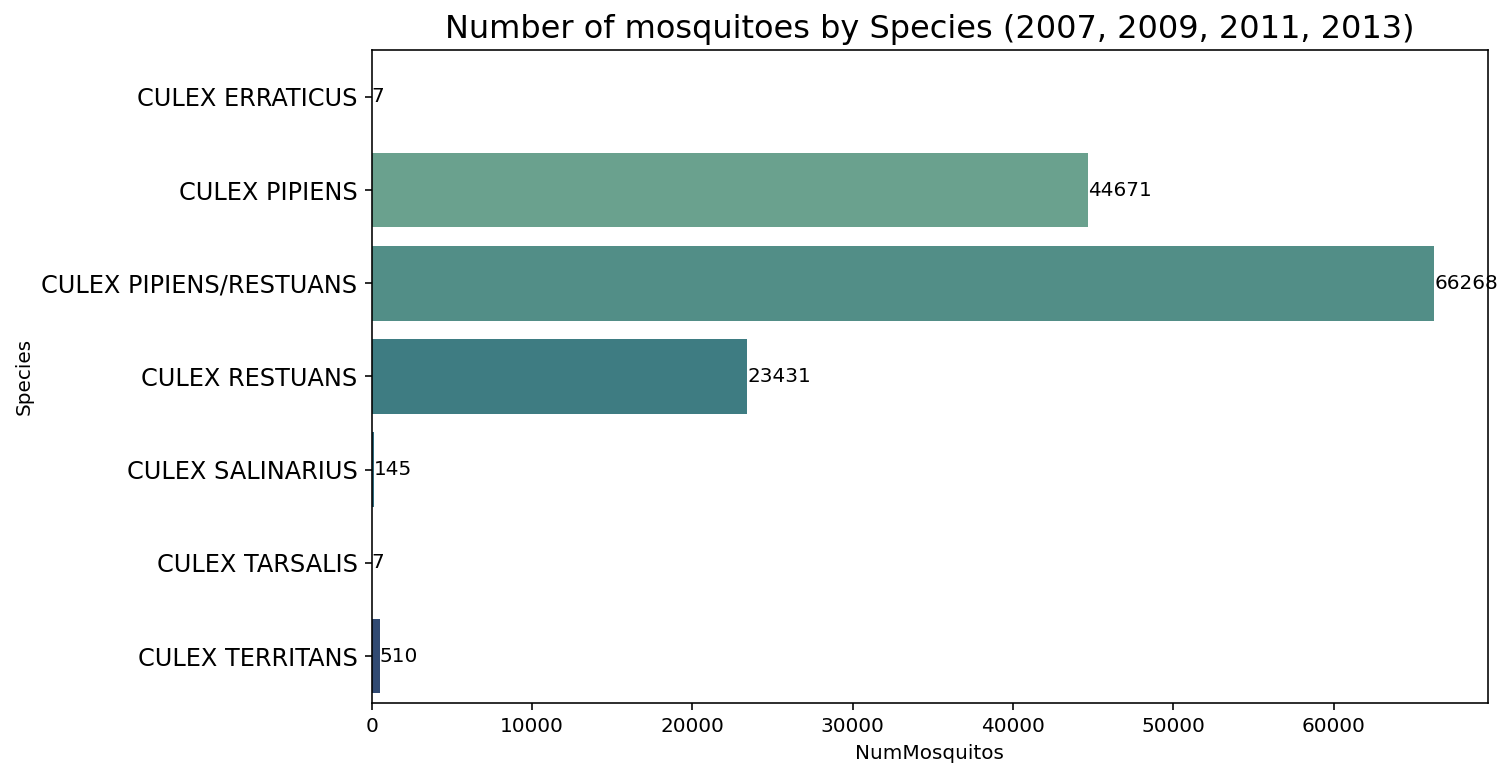

In [65]:
# Plot mosquito count distribution
plt.figure(figsize=(10,6))
ax=sns.barplot(x='NumMosquitos', 
               y='Species',
               data=species_df,
               orient='h', 
               palette='crest');
ax.bar_label(ax.containers[0])
plt.title('Number of mosquitoes by Species (2007, 2009, 2011, 2013)', fontsize=16);
plt.yticks(fontsize=12);

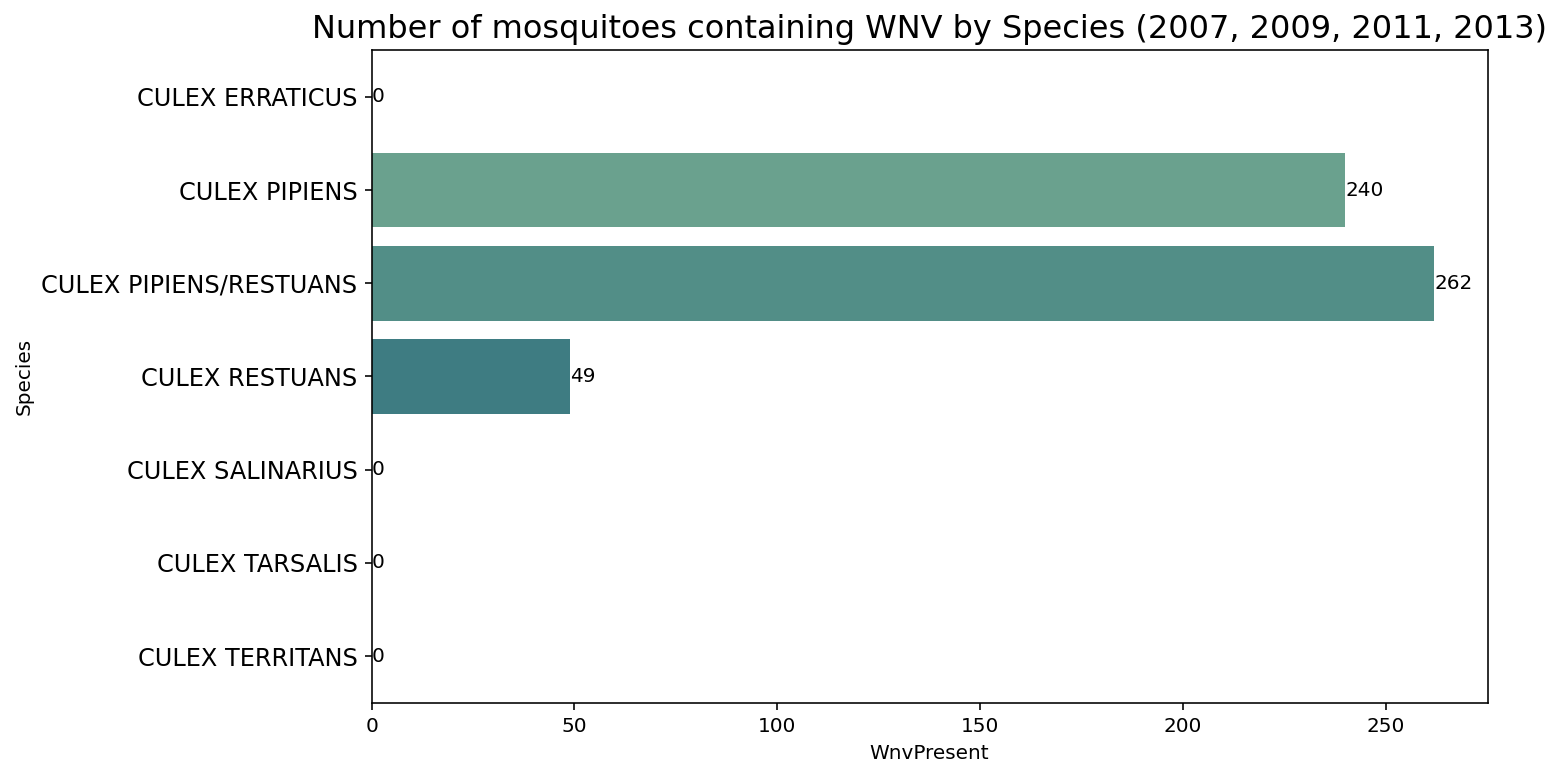

In [66]:
# Plot WnvPresent by Mosquitos Species
plt.figure(figsize=(10,6))
ax=sns.barplot(x='WnvPresent', 
               y='Species',
               data=species_df,
               orient='h', 
               palette='crest');
ax.bar_label(ax.containers[0])
plt.title('Number of mosquitoes containing WNV by Species (2007, 2009, 2011, 2013)', fontsize=16);
plt.yticks(fontsize=12);

In [67]:
# Display Species that carry WNV
# from the train data, only Pipiens or Restuans species mosquitos carry WNV
# Pipiens species mosquitos are more likely to carry WNV than the other species. 
# This is likely due to the high distribution of these species collected.
species_df[species_df['WnvPresent']>0]

Species  NumMosquitos  WnvPresent
1           CULEX PIPIENS         44671         240
2  CULEX PIPIENS/RESTUANS         66268         262
3          CULEX RESTUANS         23431          49

In [68]:
# Create dataframe for WNW carrying mosquitos
wnv_mos=train_merged.groupby(by=['Year','Month','Species']).sum()[['NumMosquitos', 'WnvPresent']].reset_index()
wnv_mos=wnv_mos[wnv_mos['WnvPresent']>0]

In [69]:
wnv_mos.head()

Year  Month                 Species  NumMosquitos  WnvPresent
7   2007      7           CULEX PIPIENS          3223           3
8   2007      7  CULEX PIPIENS/RESTUANS          3322           3
12  2007      8           CULEX PIPIENS         25637         124
13  2007      8  CULEX PIPIENS/RESTUANS         13219          70
14  2007      8          CULEX RESTUANS           867           6

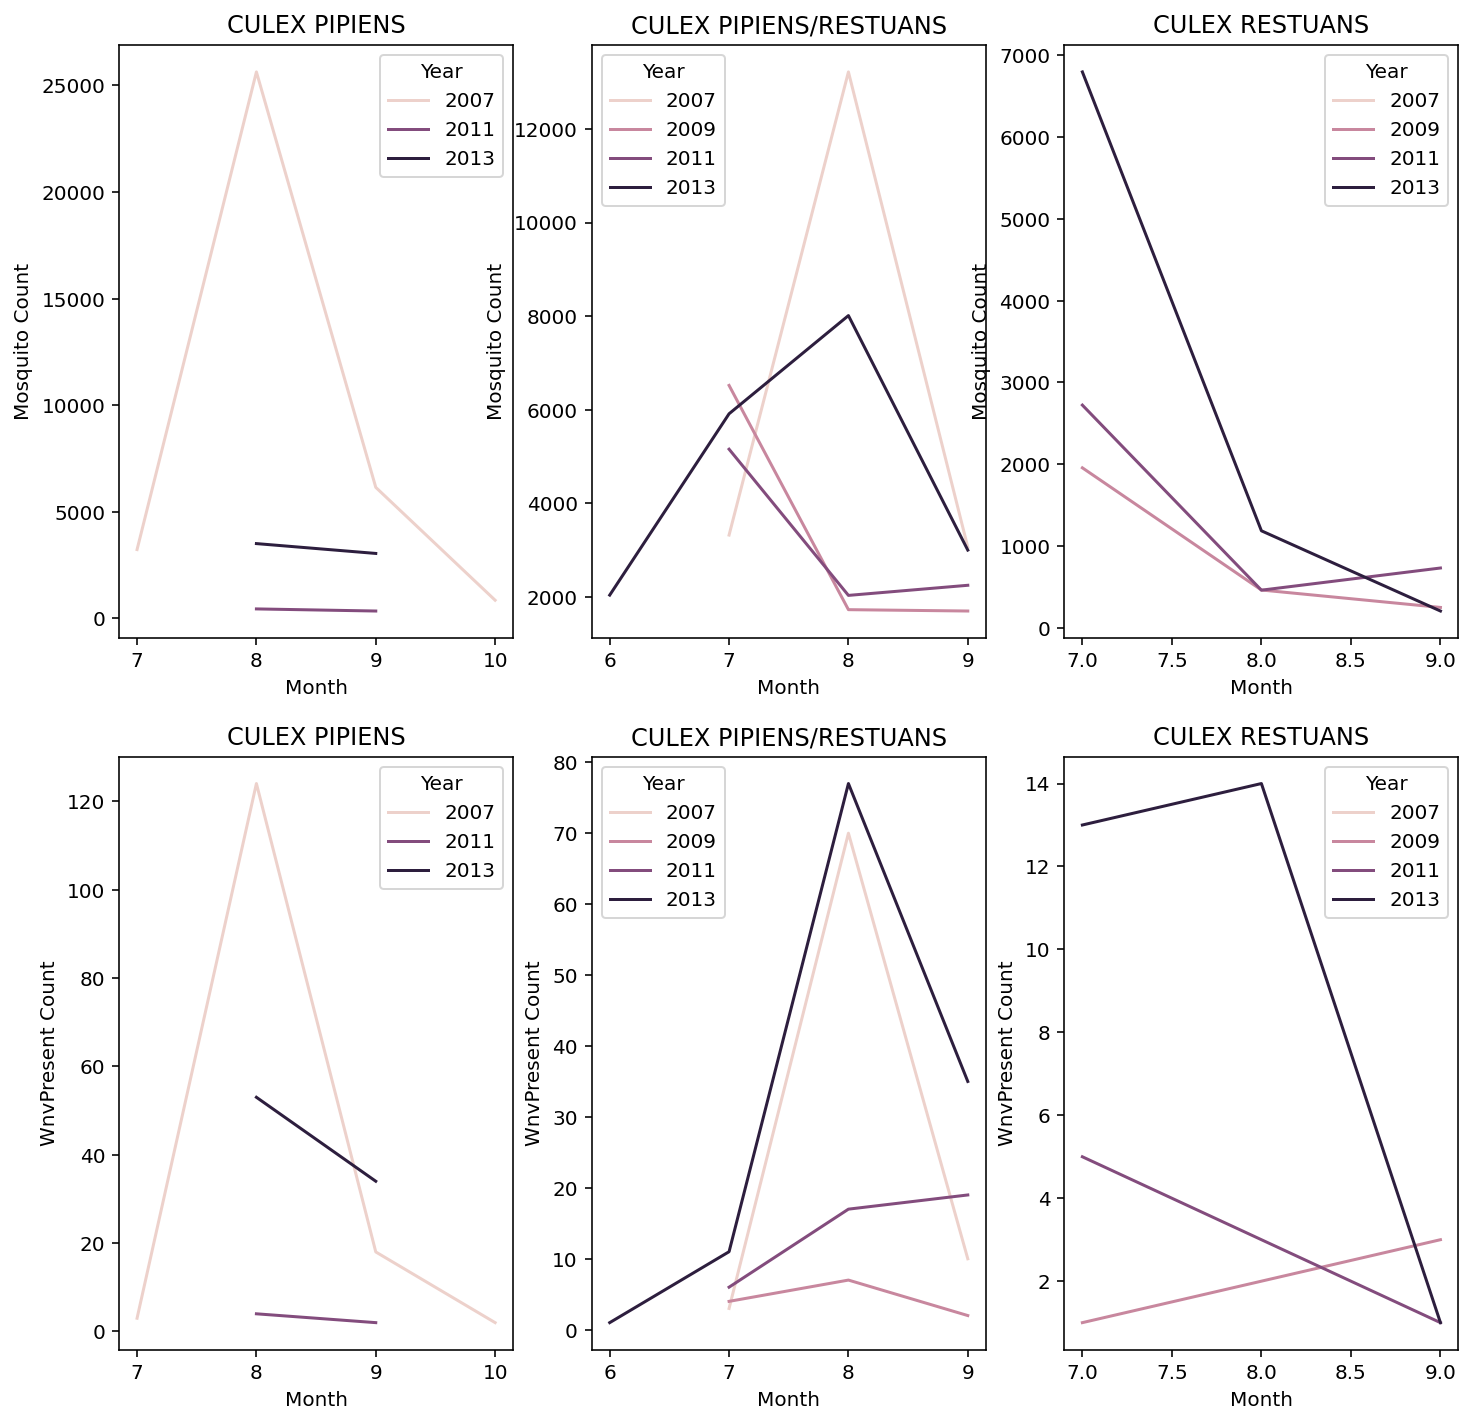

In [70]:
# plot mosquitos/ WnvPresent count by month and year
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False, figsize=(12,12))
axes=axes.ravel()

for i, species in enumerate(wnv_mos['Species'].unique()): 
    
    # plot WNV occurrences by month and year
    sns.lineplot(x='Month', 
                 y='NumMosquitos',
                 hue='Year', 
                 data=wnv_mos[wnv_mos['Species']==species],
                 ax=axes[i],
                 ci = None)
    axes[i].set_ylabel("Mosquito Count")
    axes[i].set_title(f'{species}')

for i, species in enumerate(wnv_mos['Species'].unique(), 3): 
    
    # plot WNV occurrences by month and year
    sns.lineplot(x='Month', 
                 y='WnvPresent',
                 hue='Year', 
                 data=wnv_mos[wnv_mos['Species']==species],
                 ax=axes[i],
                 ci = None)
    axes[i].set_ylabel("WnvPresent Count")
    axes[i].set_title(f'{species}')

plt.show()

## Data Dictionary

**Train and Test data:**
- The train set consists of data from the years 2007, 2009, 2011, and 2013. 
- The test set contains data from the years 2008, 2010, 2012, and 2014.

|Feature|Description|
|:-------|:------------|
|**Id**|the id of the record|
|**Date**|the date that the WNV test was performed|
|**Address**|the approximate address of the location of trap (to be sent to GeoCoder)|
|**Species**|the species of mosquitos|
|**Block**|the block number of address|
|**Street**|the street name|
|**Trap**|the trap ID|
|**AddressNumberAndStreet:**|the approximate address returned from GeoCoder|
|**Latitude, Longitude**|the latitude and longitude returned from GeoCoder|
|**AddressAccuracy**|the address accuracy returned from GeoCoder|
|**NumMosquitos**|the number of mosquitoes caught in this trap|
|**WnvPresent**|whether WNV is detected in mosquitos (1 is present, 0 is not present)|


**Spray data:**
- The spray set consists of data in 2011 and 2013. 

|Feature|Description|
|:-------|:------------|
|**Date, Time**|the date and time of the spray|
|**Latitude, Longitude**|the latitude and longitude returned from GeoCoder|


**Weather data:**
- weather data from 2007 to 2014.
- Column descriptions in [link](https://www.kaggle.com/competitions/predict-west-nile-virus/data?select=noaa_weather_qclcd_documentation.pdf). 




## Modeling

- The goal is of course to build a model and make predictions that the city of Chicago can use when it decides where to spray pesticides! Your team should have a clean Jupyter Notebook that shows your EDA process, your modeling and predictions.
- Conduct a cost-benefit analysis. This should include annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit). (Hint: How would we quantify the benefit of pesticide spraying? To get "maximum benefit," what does that look like and how much does that cost? What if we cover less and therefore get a lower level of benefit?) --> outside research to answer this question. 
- Your final submission CSV should be in your GitHub repo.

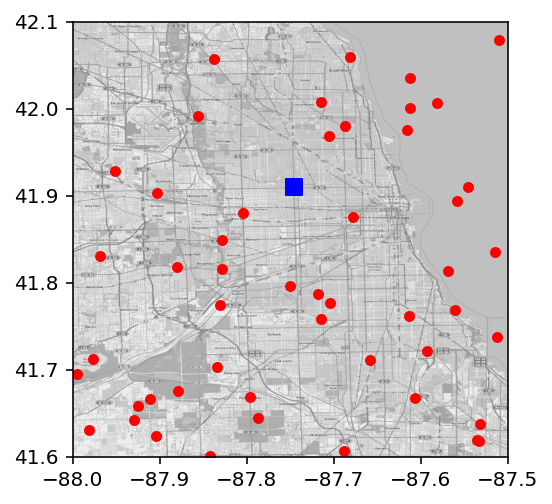

In [71]:
import numpy as np
import matplotlib.pyplot as plt

origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")


# generate some data to overlay
numPoints = 50
lats = (upperRight[0] - origin[0]) * np.random.random_sample(numPoints) + origin[0]
longs = (upperRight[1] - origin[1]) * np.random.random_sample(numPoints) + origin[1]

intersection = [41.909614, -87.746134]  # co-ordinates of intersection of IL64 / IL50 according to Google Earth


# generate plot
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs, y=lats, c='r', s=20)
plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')

plt.show()
# plt.savefig('map.png')